Para obtener un mejor resultado en la integración, es mejor utilizar la aproximación de segundo orden y con varias variables:

$$\vec y_{n+1} = y_n + h\vec f + \frac{1}{2}h^2 \left(\frac{\partial \vec f}{\partial x} + \mathbb{J} \vec f \right),$$ donde $\vec f$ es $f(x_n,\vec y_n)$ y $\mathbb{J}$ el jacobiano de $f$ evaluado en $(x_n,\vec y_n)$, con un error de orden $O(h^2)$.

In [7]:
from pylab import *
%matplotlib inline

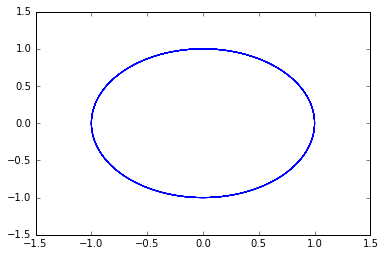

In [31]:
def integra2(ec,d_ec,p_ini,x,h=0.1):
   
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    for i in xrange(len(tiempos)-1):
        f = ec(sol[i,:],tiempos[i])
        df,jac=d_ec(sol[i,:],tiempos[i])
        sol[i+1,:]=sol[i,:]+h*f+(0.5*h*h*(df+dot(jac,f)))
    
    return tiempos,sol

def prueba(y,t):
    return array([y[1],-y[0]]) 

def d_prueba(y,t):
    return array([0,0]),array([[0,1],[-1,0]])

t,y=integra2(prueba,d_prueba,[1,0],[0,50],0.01)
plot(y[:,0],y[:,1])
#plot(t,y[:,0],t,cos(t))

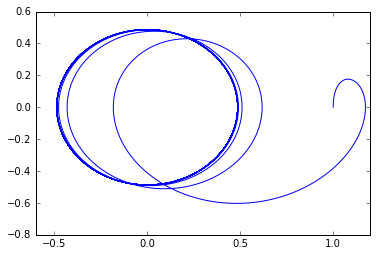

In [39]:
def p(y,t):
    return array([y[1],-2*y[1]-0.5*sin(y[0])+cos(t)])

def dp(y,t):
    return array([0,cos(t)]),array([[0,1],[-0.5*cos(y[0]),-2]])

t,y=integra2(p,dp,[1,0],[0,100],0.01)
plot(y[:,0],y[:,1])

In [42]:
def rk2(ec,p_ini,x,h=0.1):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    for i in xrange (len(tiempos)-1):
        k = h*ec(sol[i,:],tiempos[i])
        f = ec(sol[i,:]+0.5*k,tiempos[i]+0.5*h)
        sol[i+1,:]=sol[i,:]+h*f
    return tiempos,sol

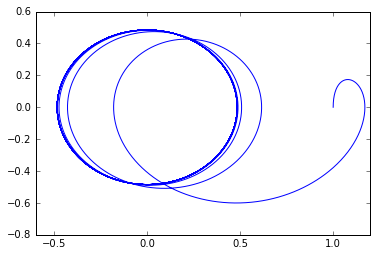

In [43]:
t,y=rk2(p,[1,0],[0,100],0.01)
plot(y[:,0],y[:,1])

In [11]:
A = array([[1,0],[0,1]])
A2 = matrix([[1,0],[0,1]])
print A

print A*b

print A*a

print A2

print dot(A2,b)

[[1 0]
 [0 1]]
[[2 0]
 [0 6]]
[[2 0]
 [0 6]]
[[1 0]
 [0 1]]
[[2 6]]


In [18]:
A = array([[1,2],[3,4]])
a = array ([6,7])
print A[0,0], A[0,1],A[1,0],A[1,1]
print A*a
print dot(A,a)

1 2 3 4
[[ 6 14]
 [18 28]]
[20 46]


In [2]:
x=zeros((2,6))
print x
x[1,1]=3
x[0,1]=9
print x
print x[:,1]
print x[1,:]
print type (x[1,:])
print x[1,:]*8

[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]
[[ 0.  9.  0.  0.  0.  0.]
 [ 0.  3.  0.  0.  0.  0.]]
[ 9.  3.]
[ 0.  3.  0.  0.  0.  0.]
<type 'numpy.ndarray'>
[  0.  24.   0.   0.   0.   0.]
